# Planetbanor

### Solen i centrum <img src="Cirkel.png" width = 40% style="float:right"/>

Jordens bana kring solen $\vec{r} = (x,y)$ med
\begin{align}
    x & = r \cos \omega t  \\
    y & = r \sin \omega t
\end{align}
där
\begin{align}
    r & = \text{avståndet till solen}  \\
    \omega & = \text{vinkelhastighet}
\end{align}
I astronomiska enheter (au) och dagar (d)
\begin{align}
    r & = 1{,}0 \, \mathrm{au} \,, \\
    \omega & = \frac{2 \pi}{T} = \frac{2 \pi}{365 \, \mathrm{d}} = 0{,}0172 \, \mathrm{d}^{-1}.
\end{align}

In [276]:
# Biblioteket Numpy (np) ger oss tillgång till "np.pi", "np.sin", "np.cos" och "np.linspace".
import numpy as np

In [277]:
np.pi

3.141592653589793

In [295]:
r_j = 1.0 # Jordens avstånd från solen i au
T_j = 365 # Jordens omloppstid i d
w_j = 2 * np.pi / T_j # Jordens vinkelhastighet i /d

In [279]:
print(w_j)

0.01721420632103996


In [280]:
t_min = 0
t_max = 365
n = 1000

t = np.linspace(t_min, t_max, n + 1) # np.linspace(0, 365, 1001)

# np.linspace skapar en lista med n + 1 = 1001 olika värden på t
# från t_min = 0 till t_max = 365
# n steg om (t_max - t_min)/n = 365/1000 = 0,365

In [281]:
print(0, t[0])
print(1, t[1])
print(2, t[2])
print(n, t[n])

0 0.0
1 0.365
2 0.73
1000 365.0


In [282]:
x_j = r_j * np.cos(w_j * t) # Lista över jordens x-koordinater
y_j = r_j * np.sin(w_j * t) # Lista över jordens y-koordinater

print(0, t[0], x_j[0])
print(1, t[1], x_j[1])
print(2, t[2], x_j[2])
print(n, t[n], x_j[n])

0 0.0 1.0
1 0.365 0.9999802608561371
2 0.73 0.9999210442038161
1000 365.0 1.0


In [283]:
# Biblioteket Matplotlib (plt) gör att vi kan plotta  
import matplotlib.pyplot as plt

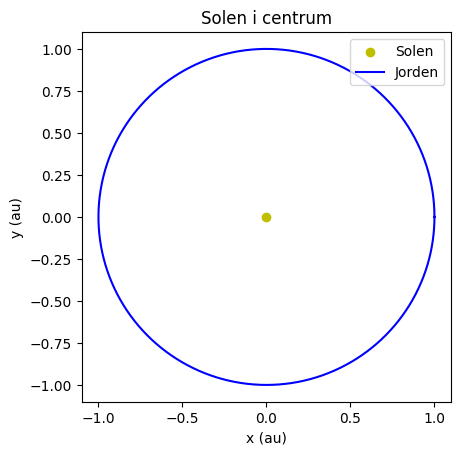

In [284]:
# Plotta solen som en punkt i origo
plt.scatter(0, 0, label = "Solen", color = "y")
# Plotta jordens position för alla t-värden
plt.plot(x_j, y_j, label = "Jorden", color = "b")  
plt.title("Solen i centrum")
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc = "upper right")
plt.gca().set_aspect("equal") # Axelförhållande x:y = 1:1
plt.show()

### Jorden i centrum <img src="Vektorer.png" width=35% style="float:right"/>
Låt
\begin{align}
    \vec{r}_j & = \text{jordens bana runt solen} \\
    \vec{r}_m & = \text{Mars bana runt solen} \\
    \vec{r}_s & = \text{solens bana runt solen} = (0,0)
\end{align}
Från jorden ser Mars ut att röra sig på banan
\begin{align}
    \vec{r}_{m-j} & = \vec{r}_m - \vec{r}_j \\
    x_{m-j} & = r_m \cos \omega_m t - r_j \cos \omega_j t \\
    y_{m-j} & = r_m \cos \omega_m t -  r_j \sin \omega_j t 
\end{align}
Från jorden ser solen ut att röra sig på banan $\vec{r}_{s-j} = \vec{r}_s - \vec{r}_j = - \vec{r}_j$

In [285]:
x_s_j = 0 - x_j # Solens x-koordinat sett från jorden
y_s_j = 0 - y_j # Solens y-koordinat sett från jorden

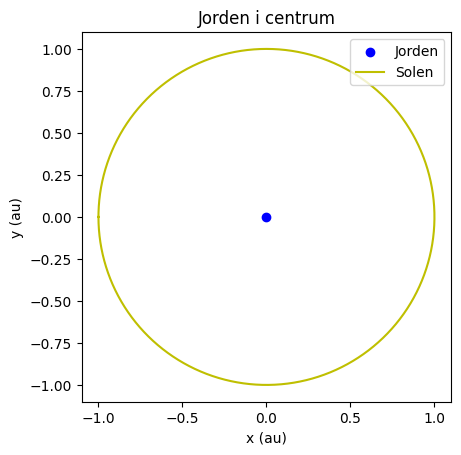

In [286]:
plt.scatter(0, 0, label = "Jorden", color = "b")
plt.plot(x_s_j, y_s_j, label = "Solen", color = "y")
plt.title("Jorden i centrum")
plt.xlabel("x (au)")
plt.ylabel("y (au)")
plt.legend(loc = "upper right")
plt.gca().set_aspect("equal")
plt.show()

# Animationer med ipywidgets

In [287]:
import ipywidgets as widgets

In [288]:
print(t[5])
print(x_s_j[5]) # x vid t = 1.825
print(x_s_j[0:6]) # Lista över alla x från och med t = 0 d till och med t = 1.285 d.

1.825
-0.9995065603657316
[-1.         -0.99998026 -0.99992104 -0.99982235 -0.99968419 -0.99950656]


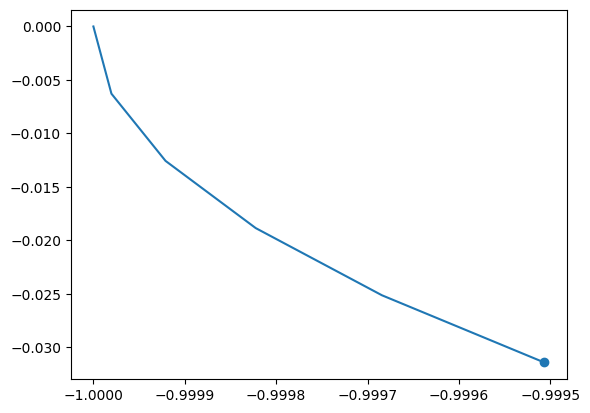

In [289]:
# Solens position för t = t[5]
plt.scatter(x_s_j[5], y_s_j[5])
# Solens bana mellan t = t[0] och t = t[5]
plt.plot(x_s_j[0:6], y_s_j[0:6])
plt.show()

In [290]:
def solen_runt_jorden(i):
    # Plotta jorden i origo
    plt.scatter(0, 0, label = "Jorden", color = "b")
    # Solens position för t = t[i]
    plt.scatter(x_s_j[i], y_s_j[i], label = "Solen", color = "y")
    # Solens bana mellan t = t[0] och t = t[i]
    plt.plot(x_s_j[0:i+1], y_s_j[0:i+1], color = "y") # inkl. 0, exkl. i+1
    plt.title("Jorden i centrum")
    plt.xlabel("x (au)")
    plt.ylabel("y (au)")
    plt.legend(loc = "upper right")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal')
    plt.gca().text(-1,1,"i = %s" %i) # skriver ut "i = ..." i punkten (-1,1)
    plt.show()

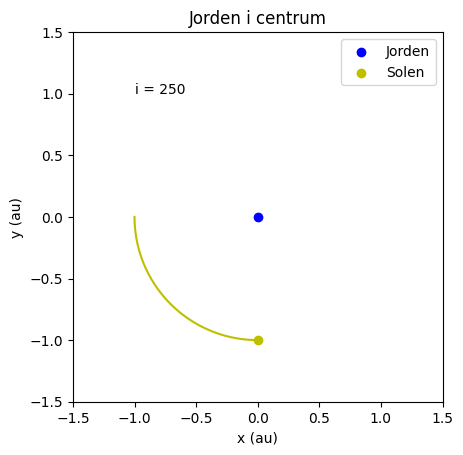

In [291]:
solen_runt_jorden(250)

In [292]:
widgets.interact(solen_runt_jorden, i = (0, n, 1));

interactive(children=(IntSlider(value=500, description='i', max=1000), Output()), _dom_classes=('widget-intera…

In [293]:
widgets.interact(solen_runt_jorden, i = widgets.Play(min = 0, max = n, step = 10));

interactive(children=(Play(value=0, description='i', max=1000, step=10), Output()), _dom_classes=('widget-inte…

## Uppgifter
1. Vad är Mars avstånd till solen (i au)?
2. Vad har Mars för vinkelhastighet?
3. Plotta Mars bana runt solen tillsammans med jordens.
4. Plotta Mars bana runt jorden tillsammans med solens.
5. Animera Mars och solens bana runt jorden.
6. Om du får tid över: uppdatera animationerna så att de löper över tid $t$ istället för index $i$. Se nästa sida.

Listan över de $n+1$ olika $t$-värdena (med $\Delta t = (t_\mathrm{max} - t_\mathrm{min})/n$)
\begin{align}
t_0 & = t_\mathrm{min} \\
t_1 & = t_\mathrm{min} + \Delta t \,, \\
t_2 & = t_\mathrm{min} + 2 \Delta t \\
    & \ldots \\
t_n & = t_\mathrm{min} + n \Delta t = t_\mathrm{max} 
\end{align}
Det $i$:te $t$-värdet
$$
t_i = t_\mathrm{min} + i \Delta t
$$
Eller tvärtom, tiden $t_i$ har index
$$
i = (t_i - t_\mathrm{min})/\Delta t
= n(t_i - t_\mathrm{min})/(t_\mathrm{max} - t_\mathrm{min})
$$

In [296]:
# Funktionen returnerar index för tiden t = tid
def index(tid):
    return round(n*(tid - t_min)/(t_max - t_min))
print(index(0))
print(index(0.365))
print(index(0.370))
print(index(2*0.365))
print(index(365))

0
1
1
2
1000
